In [4]:
# importation des librairies
import pandas as pd  
import numpy as np
import rpy2
import seaborn as sn
from sklearn.metrics import r2_score

In [5]:
# Importation de la table des données dans l'environnement de travail
df = pd.read_csv("C:/Users/GSI/Desktop/mougnutou/datascience/cours_devoirs_datascience/semaine27_28\\df_28_2.csv")

In [6]:
# dimension de la table de données
df.shape

(158, 36)

In [7]:
# Preuve de la réussite de l’importation.
df.head(4)

,date_examen,CODE,Naissance,sex,Niveau,Secteur,Ethnie,poids,taille,FEV1,...,vr,crf,rapport_vgt_cpt,rapport_vr_cpt,CIp,gaw,sraw,rva,sgaw,age
0,2022-05-06,2039,2012-05-12,2,1,2,1,57,163,1.83,...,0.10,0.92,32.0,3.0,2.01,1.83,0.50,0.55,1.98,9.989041
1,2022-04-30,2042,2015-04-10,1,1,2,3,25,125,0.97,...,1.03,1.20,54.0,46.0,1.03,1.16,1.04,0.86,0.96,7.060274
2,2022-03-09,2111,2015-08-13,2,1,1,3,20,117,0.90,...,0.31,0.49,39.0,25.0,0.77,10.00,0.30,0.10,3.33,6.575342
3,2022-03-09,2166,2015-11-07,2,1,1,3,20,117,0.90,...,NaN,NaN,NaN,NaN,NaN,10.00,0.30,0.10,3.33,6.339726


In [8]:
# 1- Créer la df_Aex_cpt
df_Aex_cpt = df.filter(["age","sex", "taille", "aire", "cpt"])

In [9]:
df_Aex_cpt.head(3)

,age,sex,taille,aire,cpt
0,9.989041,2,163,5.00,2.93
1,7.060274,1,125,1.16,2.23
2,6.575342,2,117,1.16,1.26


In [10]:
df_Aex_cpt.shape

(158, 5)

In [11]:
# types des données
df_Aex_cpt.dtypes

age       float64
sex         int64
taille      int64
aire      float64
cpt       float64
dtype: object

In [12]:
df_Aex_cpt.to_csv('C:/Users/GSI/Desktop/mougnutou/datascience/cours_devoirs_datascience/semaine27_28/df_Aex_cpt.csv', index = False)

In [13]:
# 2- Correction des types des variables dans df_Aex_cpt: il s'agit de transformer la variable sex en variable qualitatives
df_Aex_cpt["sex"]=pd.Categorical(df_Aex_cpt["sex"],ordered=False)

In [14]:
df_Aex_cpt["sex"]=df_Aex_cpt["sex"].cat.rename_categories(
["homme","femme"])

In [15]:
df_Aex_cpt.dtypes

age        float64
sex       category
taille       int64
aire       float64
cpt        float64
dtype: object

In [16]:
df_Aex_cpt.head(4)

,age,sex,taille,aire,cpt
0,9.989041,femme,163,5.00,2.93
1,7.060274,homme,125,1.16,2.23
2,6.575342,femme,117,1.16,1.26
3,6.339726,femme,117,1.16,NaN


In [17]:
# 2- Corriger le type des variables dans « df_Aex_cpt ».
df_Aex_cpt[['sex']] = df_Aex_cpt[['sex']].astype('str')

In [18]:
df_Aex_cpt.dtypes

age       float64
sex        object
taille      int64
aire      float64
cpt       float64
dtype: object

In [19]:
df_Aex_cpt.head(4)

,age,sex,taille,aire,cpt
0,9.989041,femme,163,5.00,2.93
1,7.060274,homme,125,1.16,2.23
2,6.575342,femme,117,1.16,1.26
3,6.339726,femme,117,1.16,NaN


In [20]:
# 3- Montrer que la variable « cpt » contient les valeurs manquantes
# Affichage des valeurs nulles
print(df_Aex_cpt['cpt'].isnull())

0      False
1      False
2      False
3       True
4      False
       ...  
153    False
154     True
155    False
156    False
157    False
Name: cpt, Length: 158, dtype: bool


#### Nous pouvons déjà constater qu'il y a une valeur manquante à la quatrième ligne

In [21]:
# Autre possibilité
# Nous allons compter une fois le nombre de valeurs manquantes si elles existent.
cnt = df_Aex_cpt["cpt"].isna().sum()
print(cnt)

31


#### La variable cpt à 31 valeurs manquantes

In [22]:
# Nous allons faire une imputation par la médiane
# Remplacer en utilisant la médiane
median = df_Aex_cpt['cpt'].median()
df_Aex_cpt['cpt'].fillna(median, inplace=True)

#### Vérification de l'imputation

In [23]:
print(df_Aex_cpt['cpt'].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: cpt, Length: 158, dtype: bool


In [24]:
print(df_Aex_cpt['cpt'])

0      2.93
1      2.23
2      1.26
3      3.67
4      1.98
       ... 
153    2.76
154    3.67
155    3.44
156    3.50
157    4.38
Name: cpt, Length: 158, dtype: float64


#### On remarque que la médiane de la variable cpt est 3.67

#### 4- Décrivez graphiquement la relation entre cpt et âge d’une part et entre cpt et taille d’autre part chez les garçons, puis chez les filles (cpt est la variable à expliquer). 
#### Nous allons pour celà diviser la base des données df_Aex_cpt en deux sous-base. une pour les hommes et l'autre pour les femmes.
#### Base des hommes
```{r}
df_Aex_cpt_h=filter(df_Aex_cpt_1, sex==1)
```
#### Base des femmes
```{r}
df_Aex_cpt_f=filter(df_Aex_cpt_1, sex==2)
```

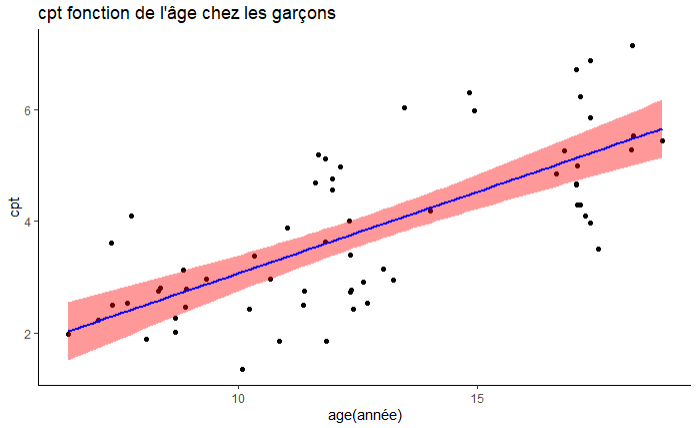

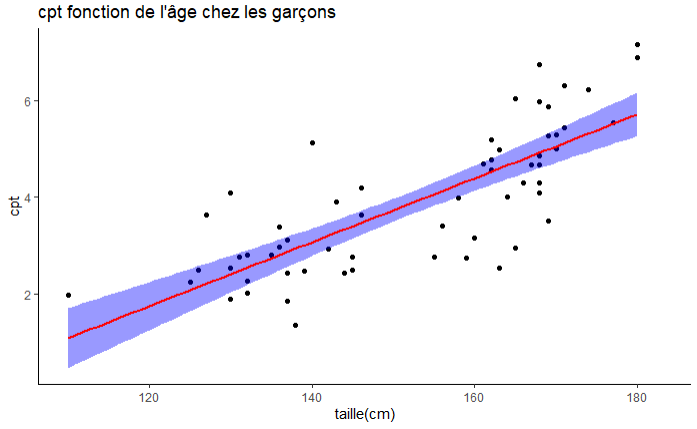

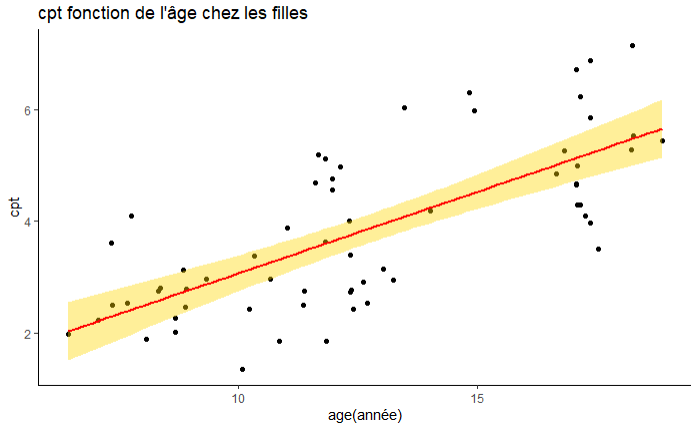

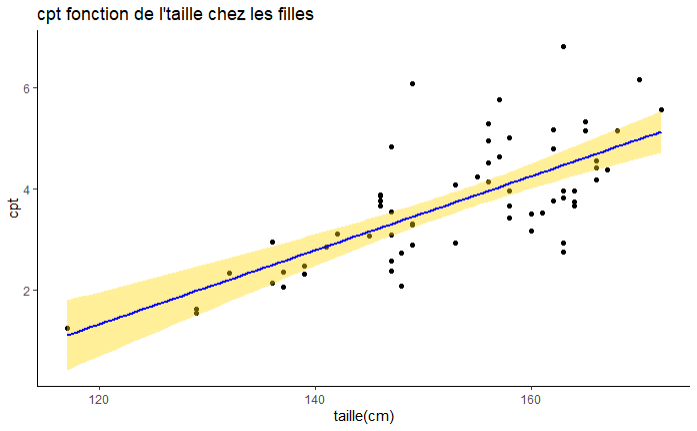

In [25]:
# résumé numerique des variables de df_Aex_cpt
df_Aex_cpt.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,158.0,13.26,3.47,6.34,10.83,12.62,16.98,19.13
taille,158.0,152.59,14.47,110.00,141.25,156.00,164.00,183.00
aire,158.0,7.76,5.93,1.16,3.56,5.62,10.09,28.22
cpt,158.0,3.77,1.18,1.26,2.93,3.67,4.41,7.15


#### 5- Façons optimale de faire une imputation pour la cpt

### II. Partie II : 

#### 6.	Définissez et expliquez les métriques suivantes permettant de comparer les modèles de régression en apprentissage automatique 

#### R2 : coefficient de détermination, il représente la puissance prédictive du modèle sous la forme d’une valeur comprise entre 0 et 1.


#### -  Erreur quadratique moyenne (MSE) : 

#### -	Racine de l'erreur quadratique moyenne (RMSE) : crée une valeur unique qui résume l’erreur dans le modèle.

#### NB : la MSE et la RMSE quantifient les erreurs réalisées par le modèle. Plus elles sont élevées, moins le modèle est performant. La MSE et la RMSE sont donc particulièrement utiles lorsque l’on préfère éviter de faire de grandes erreurs.

#### Ces métriques pénalisent plus fortement les grandes erreurs que les petites erreurs. Etant donné le carré dans la somme, une erreur 3 fois plus grande aura 9 fois plus d’impact sur la moyenne
#### Par conséquent elles sont très sensibles aux outliers. 
Les outliers sont des points pour lesquels la valeur réelle est aberrante. La prédiction sera donc souvent très éloignée de cette valeur aberrante, ce qui accroît fortement la contribution des individus outliers dans ces métriques.
#### Elles sont facilement optimisables.
Ces métriques sont dérivables et peuvent être utilisées avec des algorithmes à base de gradient. On peut même dans certains cas obtenir une formule explicite sans avoir à faire d’optimisation stochastique. C’est le cas de la régression par moindres carrés ordinaires (MCO).


#### - Critère d’information d’Akaike (AIC) : permet d’évalue la bonne adéquation d'un modèle et surtout de comparer plusieurs modèles entre eux

#### -	  Critère d’information bayésien (BIC) : critère pour la sélection du modèle parmi un ensemble fini de modèles. Il repose en partie sur la fonction de vraisemblance.

#### 7- Construire les modèles d’apprentissage automatique permettant de prédire l’aire sous la courbe (Aex) chez les filles en fonction de l’âge et de la taille 

#### TRansformation logarythmique

Text(0.5, 1.0, 'Log-Transformed Data')

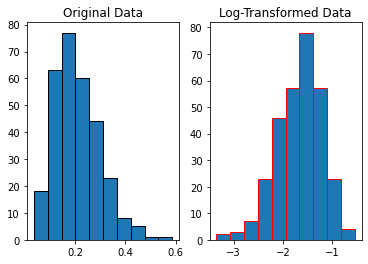

In [26]:
import numpy as np
import matplotlib.pyplot as plt
 
# Importation de la base
df_f = pd.read_csv("C:/Users/GSI/Desktop/mougnutou/datascience/cours_devoirs_datascience/semaine27_28\\df_Aex_cpt_f.csv")

np.random.seed(0)

#create beta distributed random variable with 157 values
df_f = np.random.beta(a=4, b=15, size=300)

#create log-transformed data
data_log = np.log(df_f)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df_f, edgecolor='black')
axs[1].hist(data_log, edgecolor='red')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

#### Construction du model

In [39]:
# Selectionner les prédicteurs et la variable réponse
# Diviser le dataset en train et test set (il faut avoir un module pouvant le faire)

X1 = pd.read_csv('C:/Users/GSI/Desktop/mougnutou/datascience/cours_devoirs_datascience/semaine27_28/df_f_X.csv');
y1 = pd.read_csv('C:/Users/GSI/Desktop/mougnutou/datascience/cours_devoirs_datascience/semaine27_28/df_f_y.csv');

X = y1.drop(columns =['Unnamed: 0']);
y = X1.drop(columns =['Unnamed: 0']);

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [40]:
X.head(4)

,age,taille
0,7.060274,125
1,6.427397,110
2,10.068493,138
3,7.676712,130


In [41]:
X_train.shape

(59, 2)

In [42]:
y.head(4) 

,aire
0,1.16
1,1.19
2,1.69
3,1.96


In [43]:
y_train.shape

(59, 1)

In [73]:
#Preparation de la base pour les modeles de predictions
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# On crée une chaine de transformation appeler pipeline pour éxécuter un ensemble de consignes au même moment
# Avec les 2 modèles choisis nous n'avons pas besoin de standardiser ou normaliser les données
from sklearn.pipeline import make_pipeline

# Construire les pipelines qui vont permettre de faire les transformations succèssives de chaque type de variables
#ici on a les variables contnues on utilise la transformation numerique
from sklearn.compose import make_column_transformer

numerical_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
numerical_features = ['age', 'taille', 'aire']
preprocessor = make_column_transformer((numerical_pipeline, numerical_features))

#### Regression lineaire

In [99]:
from sklearn.linear_model import LinearRegression
LR= make_pipeline (preprocessor,LinearRegression())
LR=LR.steps[1][1]
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LR.coef_, LR.score(X_test, y_pred), LR.score(X_test, y_test), r2_score(y_test, y_pred)

(array([[0.96294461, 0.16579275]]),
 1.0,
 0.6986129571214348,
 0.6986129571214348)

In [100]:
# Evaluation
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

#### K Neighbors Regressor

In [63]:
# Model pour le K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
KN = KNeighborsRegressor(n_neighbors=5, weights='uniform')
KN.fit(X_train, y_train)

KNeighborsRegressor()

In [64]:
r2_score(y_test, KN.predict(X_test))

0.8400341991363999

#### Gradient Boosting Regressor

In [95]:
# Model pour Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB_model= make_pipeline (preprocessor,GradientBoostingRegressor(random_state=1 ))
GB_model=GB_model.steps[1][1]
GB_model.fit(X_train, y_train)

C:\Users\GSI\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=1)

In [96]:
r2_score(y_test, GB_model.predict(X_test))

0.8514210772001969

#### Random Forest Regressor 

In [65]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=2, random_state=0)
RF.fit(X_train, y_train)

C:\Users\GSI\AppData\Local\Temp\ipykernel_11032\752245477.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


RandomForestRegressor(n_estimators=2, random_state=0)

In [66]:
r2_score(y_test, RF.predict(X_test))

0.8211117546486943

#### Support Vector Machine 

In [71]:
# Model pour Support Vector Machine
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from statsmodels.tools.eval_measures import mse
from sklearn.svm import SVC
import numpy as np

In [74]:
SVM_model= make_pipeline (preprocessor,svm.SVR(kernel='linear'))
SVM_model=SVM_model.steps[1][1]
SVM_model.fit(X_train, y_train)

C:\Users\GSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [81]:
#Evaluation du model
SVM_model.predict(X_train)

array([ 9.19491594,  2.87236818,  5.77232654,  9.29868279,  8.19829161,
       13.56422634,  3.1971248 ,  8.54159022, 11.78371364,  6.4764564 ,
        4.68831878,  3.81019081, 13.68158131,  0.2497943 , 13.22244958,
       16.75058393,  0.96039987,  7.6717239 , 12.24918904, 13.27757086,
        7.42075474,  6.24568312,  9.48690574, 13.05137097,  1.93734083,
        3.65117848,  1.21289088, 14.86478254,  8.93137584, 15.35362956,
        0.10538727, -0.25061433, 13.33447024,  0.80888042, 11.54354516,
        1.0030744 ,  2.56793164, 11.83197092, 10.3887858 , 12.94506509,
        2.77495283, 12.82148283,  1.72574625,  4.15476285,  5.78832949,
        4.79843712, 15.44494967, 14.29007393, -3.09417799,  6.10191281,
       13.59585178, 15.92084528,  1.53688658, 13.55216006,  8.74111852,
        8.02759346,  9.56831814,  8.0574408 ,  2.99505747])

In [82]:
SVM_model.predict(X_test)

array([ 6.29826537,  4.92620448,  1.93734083,  2.84785516,  3.87166358,
        3.75113286,  8.93137584,  5.26010789, 13.22244958, 12.90162962,
        5.2363558 ,  8.69019017, 14.25069935, 10.23942492, 13.21216141])

In [83]:
r2_score(y_train, SVM_model.predict(X_train))

0.7191865041257767

#### 8- Produire une fonction permettant d’évaluer les modèles avec toutes les métriques ci-dessus. 

#### Les metrics

In [85]:
from sklearn.metrics import mean_squared_error
import math
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC

In [86]:
start_time = time.time()
lasso_lars_ic = make_pipeline(
    StandardScaler(), LassoLarsIC(criterion="aic", normalize=False)
).fit(X_train, y_train)
fit_time = time.time() - start_time

C:\Users\GSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

In [88]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X_train, y_train)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

C:\Users\GSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
6.183472,494.767539,494.767539
5.486256,460.375132,462.452670
0.000000,320.626210,324.781285


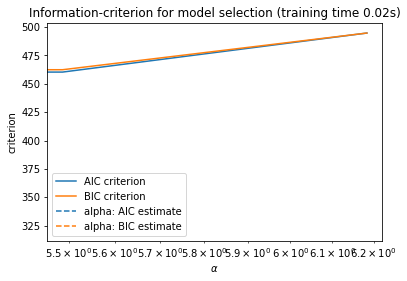

In [90]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)

In [91]:
#Fonction evaluation qui permet dexcuter une ligne de code pour avoir tous les scores

def evaluation1(model):
    model_1 = model.steps[1][1]
    model_1.fit(X_train, y_train)
    y_pred = model_1.predict(X_test)
    R2 = r2_score(y_test,y_pred)
    MSE = mean_squared_error(y_pred, y_test)
    RMSE = math.sqrt(MSE)
    results.style.apply(highlight_min)
    print('R2:', R2)
    print('MSE:', MSE)
    print("Root Mean Square Error:",RMSE)

In [101]:
KNN_model= make_pipeline (preprocessor,KNeighborsRegressor())
RF_model= make_pipeline (preprocessor,RandomForestRegressor(random_state=1 ))
GB_model= make_pipeline (preprocessor,GradientBoostingRegressor(random_state=1 ))
SVM_model= make_pipeline (preprocessor,svm.SVR(kernel='linear'))
LR_model= make_pipeline (preprocessor,LinearRegression())
print('Gradient Boosting:'),print(evaluation1(GB_model)), print('++++++++++++++++++'),
print('K Nearest Neighbors:'),print(evaluation1(KNN_model)), print('++++++++++++++++++'),
print('Random Forest:'),print(evaluation1(RF_model)),
print('Support Vector Machine :'),print(evaluation1(SVM_model)),
print('Linear regression :'),print(evaluation1(LR_model))

Gradient Boosting:
R2: 0.8514210772001969
MSE: 9.56018967922248
Root Mean Square Error: 3.0919556399182833
None
++++++++++++++++++
K Nearest Neighbors:
R2: 0.8400341991363999
MSE: 10.292869066666666
Root Mean Square Error: 3.2082501564975674
None
++++++++++++++++++
Random Forest:
R2: 0.8582496792872579
MSE: 9.120808843999974
Root Mean Square Error: 3.0200676886454008
None
Support Vector Machine :
R2: 0.6116082742960622
MSE: 24.990749008008795
Root Mean Square Error: 4.999074815204189
None
Linear regression :
R2: 0.6986129571214348
MSE: 19.392503610093886
Root Mean Square Error: 4.403692043058175
None


C:\Users\GSI\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GSI\AppData\Local\Temp\ipykernel_11032\4047800958.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train, y_train)
C:\Users\GSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(None, None)

In [102]:
## Recherche des hyperparametres optimaux avec gradients boosting 
from sklearn.model_selection import RandomizedSearchCV

# For gradient boosting regressor
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))
GB = RandomizedSearchCV(GB_model.steps[1][1], distributions, random_state=0)
search = GB.fit(X_train, y_train)
search.best_params_

C:\Users\GSI\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GSI\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GSI\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GSI\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

{'n_estimators': 93, 'max_depth': 4}

#### 10- Construire une application web permettant de calculer automatiquement l’aire sous la courbe.  Avec la regression lineaire

In [104]:
import streamlit as st
import pandas as pd
import numpy as np

st.write("""
# aire EStimator
By Guy Yone et al. 

cette application estime l’aire sous la courbe débit-volume expiratoire  
""")

st.sidebar.header('User Input Parameters(please select patients features here)')

def user_input_features():
    age = st.sidebar.number_input('age, years', 6, 20, 14)
    taille = st.sidebar.number_input('taille, cm', 103, 196, 182)

    data = {'Age': age,
            'taille': taille }

    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()

st.subheader('User Input parameters')
st.write(df)

df_f = pd.read_csv("C:/Users/GSI/Desktop/mougnutou/datascience/cours_devoirs_datascience/semaine27_28\\df_Aex_cpt_f.csv")

# Selectionner les prédicteurs et la variable réponse
# Diviser le dataset en train et test set (il faut avoir un module pouvant le faire)
from sklearn.model_selection import train_test_split
# Selectionner les prédicteurs et la variable réponse
# Diviser le dataset en train et test set (il faut avoir un module pouvant le faire)

y = df_f['aire']
X = df_f.drop(columns =['aire'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,  random_state=0)

numerical_features = ['age', 'taille']

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# On crée une chaine de transformation appeler pipeline pour éxécuter un ensemble de consignes au même moment
# Avec les 2 modèles choisis nous n'avons pas besoin de standardiser ou normaliser les données
from sklearn.pipeline import make_pipeline

# Construire les pipelines qui vont permettre de faire les transformations succèssives de chaque type de variables
from sklearn.compose import make_column_transformer
numerical_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
preprocessor = make_column_transformer((numerical_pipeline, numerical_features))

# Entrainer les modèles selectionnés
from sklearn.ensemble import GradientBoostingRegressor

GB = make_pipeline(preprocessor, GradientBoostingRegressor(max_depth = 4, n_estimators = 93, random_state=1 ))

GB = GB.steps[1][1]
GB.fit(X, y)

# Prediction
st.write('aire_calculée')
aire_cal = GB_model.predict(df)
aire_cal = aire_cal[:]
aire_cal

ValueError: could not convert string to float: 'femme'